## Loading the required libaries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [5]:
df_train = pd.read_csv("Data/train.csv")

In [6]:
df_test = pd.read_csv("Data/test.csv")

## Quick Data Check

#### Training set

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Statistical summary of the dataset's numerical features
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Checking for missing values per features
missing_values = df_train.isna().sum()
missing_percentage = (missing_values / len(df_train)) * 100

print("---- Missing Values per feature ----")
print(missing_values)

print("\n")

print("---- Mising Percentage per features ----")
print(missing_percentage)

# the 'Cabin' feature has the highest percentage of missing values

---- Missing Values per feature ----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


---- Mising Percentage per features ----
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [11]:
# Checking for data imbalance
df_train['Survived'].value_counts()

#  the training dataset is slightly imbalance

0    549
1    342
Name: Survived, dtype: int64

#### Test set

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
df_test.isna().sum()

# The 'Cabin' feature has the highest percentage missing values in the test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Survival Rate By Gender')

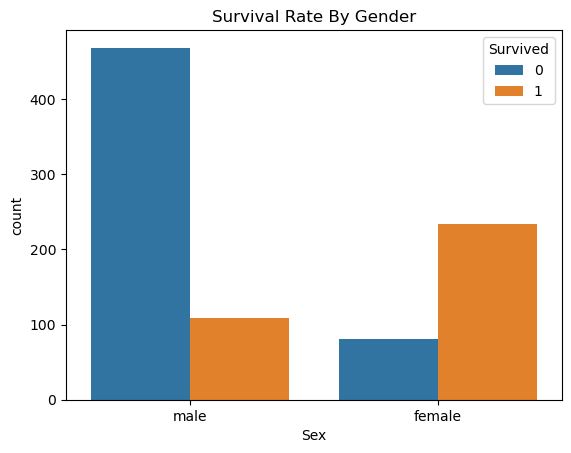

In [14]:
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title("Survival Rate By Gender")

# Females have higher survival rate compared to the males
# with higher number of females surviving

Text(0.5, 1.0, 'Survival Rate By Pclass')

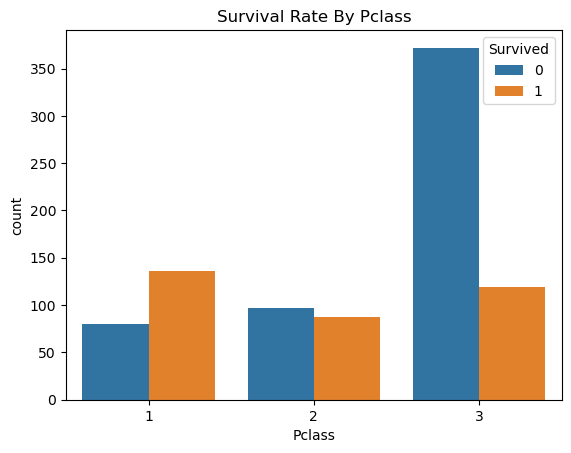

In [15]:
sns.countplot(x='Pclass', hue='Survived',data=df_train)
plt.title("Survival Rate By Pclass")

# Pclass 3 have the less survival rate compared to the rest
# with Pclass 1 having higher proportion of survived individuals

Text(0.5, 1.0, 'Survival Rate By Embarked')

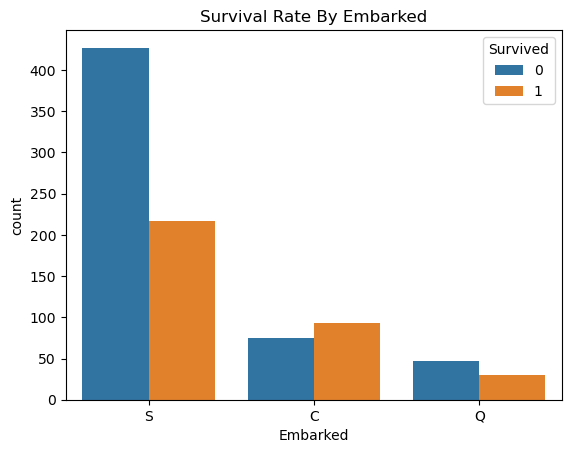

In [16]:
sns.countplot(x='Embarked', hue='Survived',data=df_train)
plt.title("Survival Rate By Embarked")

# Embarked S has the highest and the lowest survival rate

## Data Preprocessing

#### Training set

In [17]:
# This code uses regex to create a title column by extracting prefixes (Mr, Mrs) from names

df_train['Title'] = df_train['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [18]:
# This code refines the 'Title' column  by converting the French titles like 'Mlle' and 'Ms' to 'Miss',
# 'Mme' to 'Mrs' and standardizing infrequent ones

df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'], 'Miss').replace('Mme','Mrs')
df_train['Title'] = df_train['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                   'Rev','Sir','Jonkheer','Dona'],'Rare')

In [19]:
# This code fills the missing values in the 'Age' column using a group=based approach (median of their Age)

df_train['Age'] = df_train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
# This code fills the missing values in the 'Embarked' features with the mode

df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [22]:
# Checking for duplicate values

df_train.duplicated().sum()

0

In [23]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

#### Test set

In [24]:
# This code uses regex to create a title column by extracting prefixes (Mr, Mrs) from names

df_test['Title'] = df_test['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [25]:
# This code refines the 'Title' column  by converting the French titles like 'Mlle' and 'Ms' to 'Miss',
# 'Mme' to 'Mrs' and standardizing infrequent ones

df_test['Title'] = df_test['Title'].replace(['Mlle','Ms'], 'Miss').replace('Mme','Mrs')
df_test['Title'] = df_test['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                   'Rev','Sir','Jonkheer','Dona'],'Rare')

In [26]:
# This code fills the missing values in the 'Age' column using a group-based approach (the median of thier Age group)

df_test['Age'] = df_test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [27]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [69]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

## Feature Engineering

In [28]:
# Feature selection on the training set

df_train = df_train.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Title'], axis=1)

In [70]:
df_train.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [29]:
# Feature selection on the test set

df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Title',], axis=1)

In [30]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [31]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [32]:
df_train.columns[1:] == df_test.columns[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [33]:
print(df_train.columns)
print(df_test.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [34]:
X = df_train.drop('Survived', axis=1)

In [35]:
y = df_train['Survived']

## Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Futher Preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
X_test_scaled = scaler.transform(X_test)

## Modelling and Evaluation

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score

In [44]:
# Function for model training and evaluation

def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  model_preds = model.predict(X_test)

  print(f"F1 Score: {f1_score(y_test, model_preds, average='weighted')}")
  print(f"Accuracy Score: {accuracy_score(y_test, model_preds)}")
  print("\n")

  print(classification_report(y_test, model_preds))
  print("\n")
  ConfusionMatrixDisplay.from_predictions(y_test, model_preds)

using logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")

F1 Score: 0.814537655190294
Accuracy Score: 0.8134328358208955


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        78
           1       0.75      0.84      0.79        56

    accuracy                           0.81       134
   macro avg       0.81      0.82      0.81       134
weighted avg       0.82      0.81      0.81       134





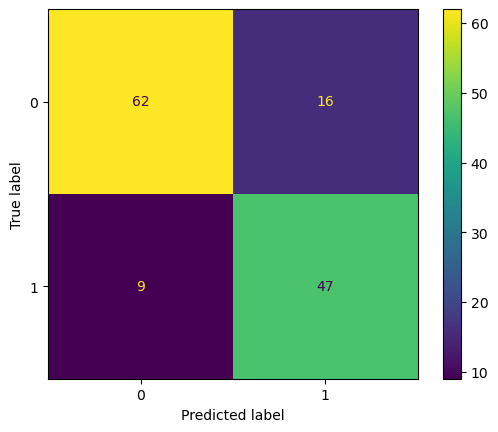

In [47]:
evaluate_model(log_model, X_train_scaled, X_test_scaled, y_train, y_test)

using random forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced" )

F1 Score: 0.8361949650245016
Accuracy Score: 0.835820895522388


              precision    recall  f1-score   support

           0       0.87      0.85      0.86        78
           1       0.79      0.82      0.81        56

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134





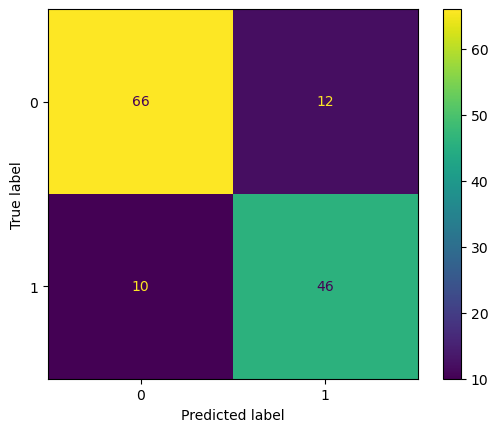

In [50]:
evaluate_model(rfc, X_train, X_test, y_train, y_test)

using Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc = GradientBoostingClassifier(random_state=42)

F1 Score: 0.8353674664651426
Accuracy Score: 0.835820895522388


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        78
           1       0.81      0.79      0.80        56

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134





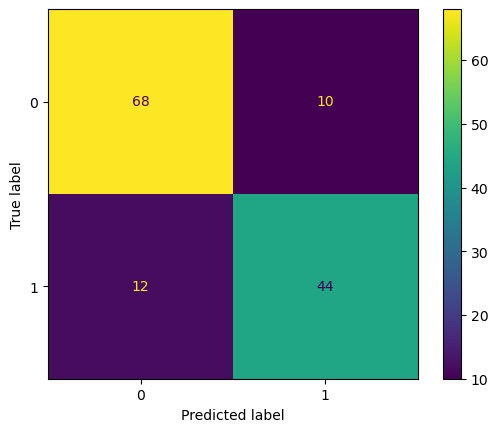

In [53]:
evaluate_model(gbc, X_train, X_test, y_train, y_test)

using Adaptive Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
adc = AdaBoostClassifier(random_state=42)

F1 Score: 0.8204008725074283
Accuracy Score: 0.8208955223880597


              precision    recall  f1-score   support

           0       0.84      0.86      0.85        78
           1       0.80      0.77      0.78        56

    accuracy                           0.82       134
   macro avg       0.82      0.81      0.81       134
weighted avg       0.82      0.82      0.82       134





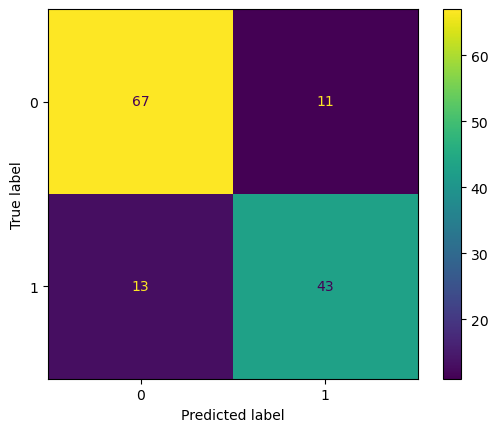

In [56]:
evaluate_model(adc, X_train, X_test, y_train, y_test)

## Cross Validation

In [60]:
# Cross validation on logistic regression

log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(scores)
print(f"{scores.mean():.4f}")

[0.80263158 0.73684211 0.81456954 0.74834437 0.76821192]
0.7741


In [61]:
# Cross validation on the rest of the model

models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced" ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Adaptive Boosting": AdaBoostClassifier(random_state=42)
}

# Compare models with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name}: {scores}")
    print(f"{name}: {scores.mean():.4f}")
    print("\n")

Random Forest: [0.77631579 0.76315789 0.79470199 0.78145695 0.8013245 ]
Random Forest: 0.7834


Gradient Boosting: [0.82894737 0.79605263 0.85430464 0.81456954 0.81456954]
Gradient Boosting: 0.8217


Adaptive Boosting: [0.81578947 0.81578947 0.79470199 0.77483444 0.78807947]
Adaptive Boosting: 0.7978




gradient boosting performed better than the rest

### Final Training

In [64]:
final_model = GradientBoostingClassifier(random_state=42)

In [65]:
final_model.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [67]:
new_X_test = df_test.drop(['PassengerId'], axis=1)
passenger_ids = df_test['PassengerId']

preds = final_model.predict(new_X_test)

# Submission
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': preds
})
submission.to_csv('submission.csv', index=False)